In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.table import Table

In [3]:
from fermipy.scripts import flux_sensitivity

In [4]:
dict20 = {'event_class': 'P8R2_SOURCE_V6',
 'galdiff': '/data/slag2/jsperki1/analysis/models/gll_iem_v06.fits',
 'glat': 0.0,
 'glon': 0.0,
 'index': 2.0,
 'isodiff': '/data/slag2/jsperki1/analysis/models/iso_P8R2_SOURCE_V6_v06.txt',
 'min_counts': 10,
 'nbin': 18,
 'obs_time_yr': 10,
 'output': 'LATsen2.000000.fits'}

In [5]:
flux_sensitivity.run_flux_sensitivity(**dict20)

In [6]:
dict35 = {'event_class': 'P8R2_SOURCE_V6',
 'galdiff': '/data/slag2/jsperki1/analysis/models/gll_iem_v06.fits',
 'glat': 0.0,
 'glon': 0.0,
 'index': 3.5,
 'isodiff': '/data/slag2/jsperki1/analysis/models/iso_P8R2_SOURCE_V6_v06.txt',
 'min_counts': 10,
 'nbin': 18,
 'obs_time_yr': 10,
 'output': 'LATsen3.500000.fits'}

In [7]:
flux_sensitivity.run_flux_sensitivity(**dict35)

In [8]:
official_file = 'differential_flux_sensitivity_p8r2_source_v6_all_10yr_zmax100_n10.0_e1.50_ts25_000_000.txt'
url = 'https://www.slac.stanford.edu/exp/glast/groups/canda/lat_Performance_files/'+official_file

In [33]:
!wget $url

--2017-06-21 10:39:45--  https://www.slac.stanford.edu/exp/glast/groups/canda/lat_Performance_files/differential_flux_sensitivity_p8r2_source_v6_all_10yr_zmax100_n10.0_e1.50_ts25_000_000.txt
Resolving www.slac.stanford.edu... 134.79.197.200, 2620:114:d000:2716::200
Connecting to www.slac.stanford.edu|134.79.197.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 990 [text/plain]
Saving to: “differential_flux_sensitivity_p8r2_source_v6_all_10yr_zmax100_n10.0_e1.50_ts25_000_000.txt”

100%[======================================>] 990         --.-K/s   in 0s      

2017-06-21 10:39:46 (22.7 MB/s) - “differential_flux_sensitivity_p8r2_source_v6_all_10yr_zmax100_n10.0_e1.50_ts25_000_000.txt” saved [990/990]



In [9]:
official = ascii.read(official_file, format='no_header')

In [10]:
meV2erg = 1.6021765300000047e-06
tab20 = Table.read('LATsen2.000000.fits',hdu=1)
tab35 = Table.read('LATsen3.500000.fits',hdu=1)
sens20 = np.array(tab20['e2dnde'])*meV2erg
sens35 = np.array(tab35['e2dnde'])*meV2erg

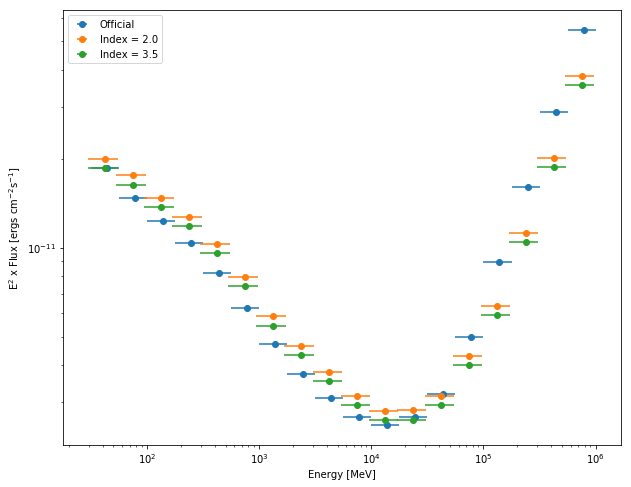

In [11]:
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy [MeV]')
plt.ylabel(r'E$^2$ x Flux [ergs cm$^{-2}$s$^{-1}$]')

plt.errorbar((official['col2'] + official['col1'])/2., 
             official['col3'],
             xerr=(official['col2'] - official['col1'])/2.,
             fmt='o', label='Official')

plt.errorbar(tab20['e_ref'], 
             sens20,
             xerr=(tab20['e_max'] - tab20['e_min'])/2.,
             fmt='o', label='Index = 2.0')


plt.errorbar(tab35['e_ref'], 
             sens35,
             xerr=(tab35['e_max'] - tab35['e_min'])/2.,
             fmt='o', label="Index = 3.5")
plt.legend(loc='upper left')

plt.show()

In [12]:
from gt_apps import filter, maketime, expCube

In [26]:
filter['ra']="INDEF"
filter['dec']="INDEF"
filter['rad'] = "INDEF"
filter['evclass'] = 128
filter['evtype'] = "INDEF"
filter['infile'] = '@data/data.txt'
filter['outfile'] = 'ft1.fits'
filter['tmin'] = "INDEF"
filter['tmax'] = "INDEF"
filter['emin'] = 0.0
filter['emax'] = 1000000.0
filter['zmin'] = 0
filter['zmax'] = 100
filter['convtype'] = -1
filter['chatter'] = 0
filter.run(print_command=True)

In [28]:
maketime['evfile'] = 'ft1.fits'
maketime['outfile'] = 'ft1_mktime.fits'
maketime['scfile'] = 'data/L170621120758C6489F7F85_SC00.fits'
maketime['filter'] = 'DATA_QUAL>0 && LAT_CONFIG==1'
maketime['apply_filter'] = 'yes'
maketime['roicut'] = 'yes'
maketime.run()

time -p gtmktime scfile=data/L170621120758C6489F7F85_SC00.fits sctable="SC_DATA" filter="DATA_QUAL>0 && LAT_CONFIG==1" roicut=yes evfile=ft1.fits evtable="EVENTS" outfile="ft1_mktime.fits" apply_filter=yes overwrite=no header_obstimes=yes tstart=0.0 tstop=0.0 gtifile="default" chatter=2 clobber=yes debug=no gui=no mode="ql"
real 158.47
user 140.43
sys 2.25


In [29]:
expCube['evfile'] = 'ft1_mktime.fits'
expCube['scfile'] = 'data/L170621120758C6489F7F85_SC00.fits'
expCube['outfile'] = 'ltcube.fits'
expCube['dcostheta'] = 0.025
expCube['binsz'] = 1
expCube['phibins'] = 0
expCube['zmax'] = 100
expCube['chatter'] = 0
expCube.run(print_command=True)

Working on file data/L170621120758C6489F7F85_SC00.fits


In [17]:
dict_ltcube = {'event_class': 'P8R2_SOURCE_V6',
 'galdiff': '/data/slag2/jsperki1/analysis/models/gll_iem_v06.fits',
 'glat': 0.0,
 'glon': 0.0,
 'index': 2.0,
 'isodiff': '/data/slag2/jsperki1/analysis/models/iso_P8R2_SOURCE_V6_v06.txt',
 'min_counts': 10,
 'nbin': 18,
 'obs_time_yr': 5,
 'ltcube' : 'ltcube.fits',
 'output': 'LATsen_ltcube.fits'}

In [18]:
flux_sensitivity.run_flux_sensitivity(**dict_ltcube)

In [19]:
tab_lt = Table.read('LATsen_ltcube.fits',hdu=1)
sens_lt = np.array(tab_lt['e2dnde'])*meV2erg


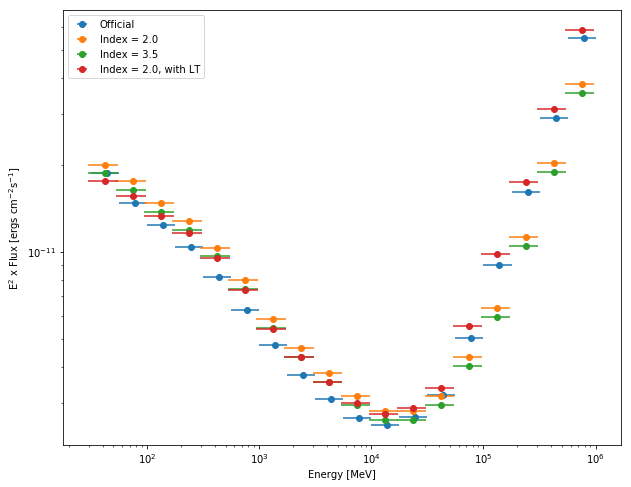

In [20]:
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy [MeV]')
plt.ylabel(r'E$^2$ x Flux [ergs cm$^{-2}$s$^{-1}$]')

plt.errorbar((official['col2'] + official['col1'])/2., 
             official['col3'],
             xerr=(official['col2'] - official['col1'])/2.,
             fmt='o', label='Official')

plt.errorbar(tab20['e_ref'], 
             sens20,
             xerr=(tab20['e_max'] - tab20['e_min'])/2.,
             fmt='o', label='Index = 2.0')


plt.errorbar(tab35['e_ref'], 
             sens35,
             xerr=(tab35['e_max'] - tab35['e_min'])/2.,
             fmt='o', label="Index = 3.5")

plt.errorbar(tab_lt['e_ref'], 
             sens_lt/2.,
             xerr=(tab_lt['e_max'] - tab_lt['e_min'])/2.,
             fmt='o', label="Index = 2.0, with LT")


plt.legend(loc='upper left')

plt.show()

In [51]:
(sens_lt / official['col3']) 

1.32812092128
1.48745509276
1.51804029362
1.58157718451
1.63615467414
1.65448948663
1.60464959209
1.60986680731
1.58881676183
1.532831319
1.46028339854


In [43]:
1./tab_lt['e_ref']

0.0237137370566
0.0133352143216
0.00749894209332
0.00421696503429
0.00237137370566
0.00133352143216
0.000749894209332
0.000421696503429
0.000237137370566
0.000133352143216
7.49894209332e-05
